data loaded successfully!
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeInde

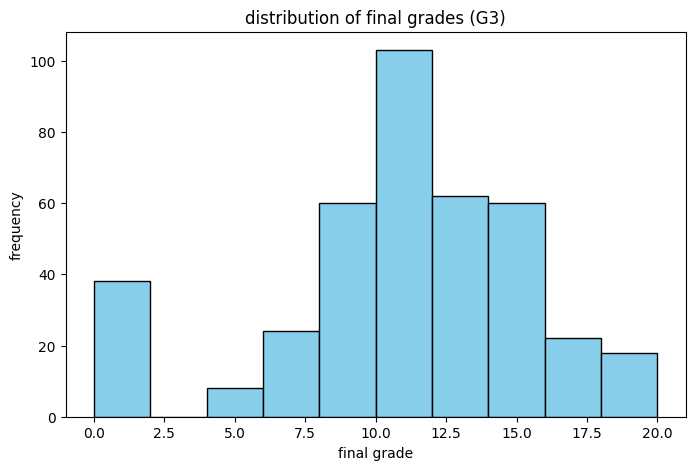

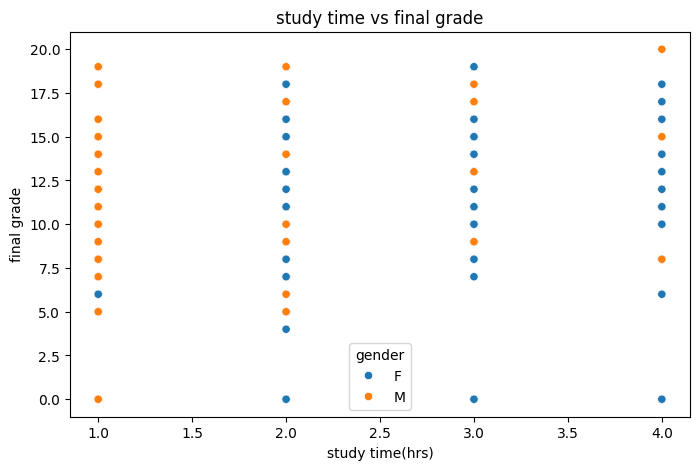

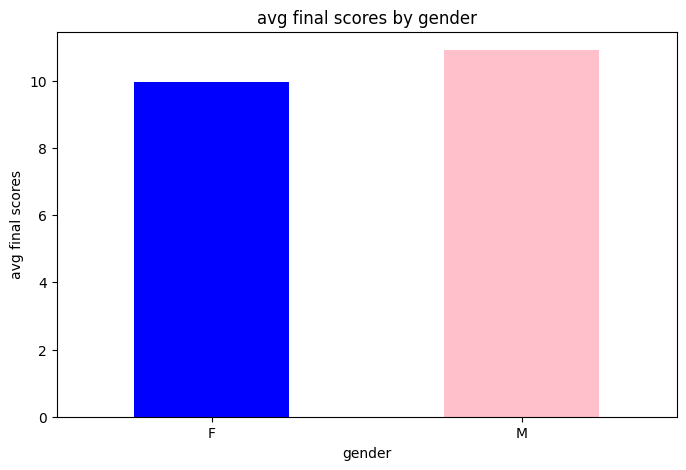

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url="https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
dataset_path="student-mat.csv"

import urllib.request
import zipfile

urllib.request.urlretrieve(url,"student.zip")

with zipfile.ZipFile("student.zip","r")as zip_ref:
    zip_ref.extractall(".")

data = pd.read_csv("student-mat.csv",sep=";")
print("data loaded successfully!")

print(data.head())
print("\ndataset info:")
print(data.info())

print("\n Missing Values:")
print(data.isnull().sum())

data = data.drop_duplicates()

#Q1:what is the avg score in math(G3)?
average_score = data['G3'].mean()
print(f"\n average math score(G3): {average_score:.2f}")

#Q2:how many students scored above 15 in their final grade(G3)?
students_above_15 = len(data[data['G3'] > 15])
print(f"Number of students scoring above 15: {students_above_15}")

#Q3: Is there a correlation between study time and final grade?
correlation = data['studytime'].corr(data['G3'])
print(f"correlation between study time and final grade: {correlation:.2f}")

#Q4: Which gender has a higher average final grade?
average_grade_by_gender = data.groupby('sex')['G3'].mean()
print("\n avg ginal grade by gender:")
print(average_grade_by_gender)

#histogram of final grade
plt.figure(figsize=(8, 5))
plt.hist(data['G3'], bins=10, color='skyblue', edgecolor= 'black')
plt.title("distribution of final grades (G3)")
plt.xlabel("final grade")
plt.ylabel("frequency")
plt.show()

#scatter plot of study time vs dinal grade
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data,x='studytime' , y='G3', hue='sex')
plt.title("study time vs final grade")
plt.xlabel("study time(hrs)")
plt.ylabel("final grade")
plt.legend(title="gender")
plt.show()

#bar chart of avg scores by gender
plt.figure(figsize=(8, 5))
average_grade_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title("avg final scores by gender")
plt.ylabel("avg final scores")
plt.xlabel("gender")
plt.xticks(rotation=0)
plt.show()




